In [1]:
from fastai.vision import *
import save_urls

In [8]:
classes = ['dog']
path = Path('data')

In [9]:
def urls_to_pics(c):
    file = f'urls_{c}'
    dest = path/c
    
    print(f'Downloading "{c}" pictures into {dest}. [{len(dest.ls())}]')
    
    download_images(path/file, dest, max_pics=100, timeout=1)
    print(f'Download completed. [{len(dest.ls())}]')
    
    verify_images(dest, delete=True, max_size=500)
    print(f'Verifycation complete. \n\nTotal {len(dest.ls())} {c} images.')

In [10]:
for c in classes:
    dest = path/c
    dest.mkdir(parents=True, exist_ok=True)
    
    response = save_urls.GoogleImages()
    response.save_url(c)
    urls_to_pics(c)

Saved 100 URLs to data/urls_dog


Error http://www.royalcanin.in/var/royalcanin/storage/images/subsidiaries/in/home/puppy-and-dog/the-dog/dogs-that-serve-man/rescue-dogs/389164-6-eng-GB/rescue-dogs_articleV3.png HTTPSConnectionPool(host='www.royalcanin.in', port=443): Max retries exceeded with url: /var/royalcanin/storage/images/subsidiaries/in/home/puppy-and-dog/the-dog/dogs-that-serve-man/rescue-dogs/389164-6-eng-GB/rescue-dogs_articleV3.png (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))

 Download of https://www.guidedogsvictoria.com.au/wp-content/themes/default/static/img/puppy.png has failed after 5 retries
 Fix the download manually:
$ mkdir -p /home/kaur/.fastai/data
$ cd /home/kaur/.fastai/data
$ wget -c https://www.guidedogsvictoria.com.au/wp-content/themes/default/static/img/puppy.png
$ tar -zxvf puppy.png

And re-run your code once the download is successful


 Download of http://onkaparingacity.com/custom/files/media/

cannot identify image file <_io.BufferedReader name='data/dog/00000026.jpg'>
cannot identify image file <_io.BufferedReader name='data/dog/00000046.jpg'>
Image data/dog/00000023.png has 4 instead of 3 channels
Image data/dog/00000005.png has 4 instead of 3 channels
cannot identify image file <_io.BufferedReader name='data/dog/00000069.jpg'>
cannot identify image file <_io.BufferedReader name='data/dog/00000002.png'>
Image data/dog/00000011.png has 4 instead of 3 channels
Image data/dog/00000081.png has 1 instead of 3 channels
Image data/dog/00000017.gif has 1 instead of 3 channels
Verifycation complete. 

Total 90 dog images.
CPU times: user 311 ms, sys: 104 ms, total: 415 ms
Wall time: 21.2 s


In [11]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [12]:
data.classes

['bear', 'deer', 'dog']

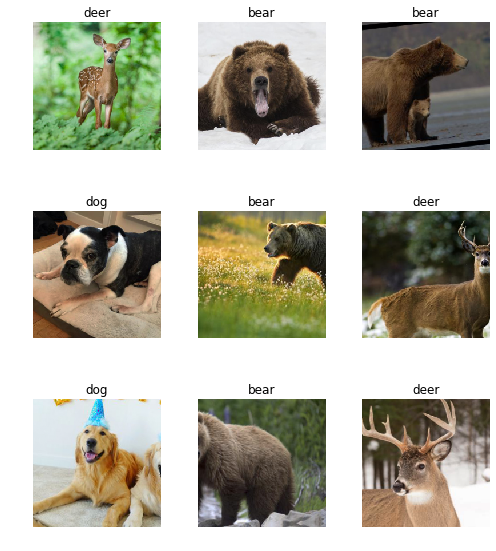

In [14]:
data.show_batch(rows=3, figsize=(7,8))

In [15]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(5)
#learn.save('stage-1')

epoch,train_loss,valid_loss,error_rate


Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/kaur/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/home/kaur/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/kaur/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/kaur/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/home/kaur/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/home/kaur/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/kaur/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _

KeyboardInterrupt: 